<a href="https://colab.research.google.com/github/sturu1/github-first/blob/master/2020_07_13_%EC%98%A4%EC%A0%84%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오토인코더1  ------------ P327



1. Simple Neural Netbook를 이용하여 Encoder및 Decoder구현
2. 자기자신을 재생성하는 네트워크
3. 



(60000, 28, 28)


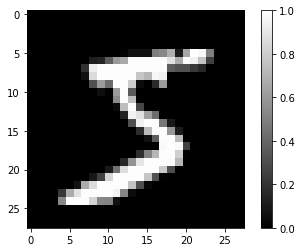

(60000, 784)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_11 (Dense)             (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0505
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0164
Epoch 3/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0113
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0093
Epoch 5/10
235/235 [=================

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()

train_X = train_X/255.0
test_X = test_X/255.0

print(train_X.shape)

plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

#flatten
train_X = train_X.reshape(-1, 28*28)
test_X = test_X.reshape(-1, 28*28)

print(train_X.shape)

model = tf.keras.Sequential()
model.add (tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(784, activation='sigmoid'))

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

#자기 자신이 입력과 출력으로 되어있음
model.fit(train_X, train_X, epochs=10, batch_size=256)

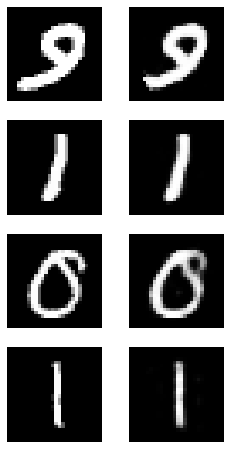

In [14]:
import random
import numpy as np

plt.figure(figsize=(4,8))
for c in range(4):
  plt.subplot(4, 2, c*2+1)
  rand_index = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(4, 2, c*2+2)
  img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
  plt.imshow(img.reshape(28, 28), cmap='gray')
  plt.axis('off')

plt.show()

#model.evaluate(test_X, test_Y)

# 오토인코더 2

1. 컨볼루션 레이어 추가
2. Relu Activation 함수 사용

(60000, 28, 28)


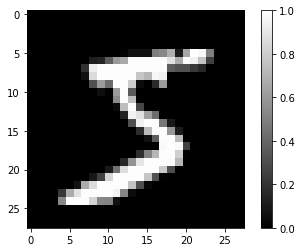

(60000, 28, 28, 1)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                200768    
_________________________________________________________________
dense_21 (Dense)             (None, 3136)              203840    
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()

train_X = train_X/255.0
test_X = test_X/255.0

print(train_X.shape)

plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

#데이터 n수, x차원, y차원, 1채널 (grayscale)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

print(train_X.shape)

#공간정보는 줄어들었고, 의미론적 정보는 늘어났다.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2, 2), activation='relu',))

#64*7*7의 1차원 벡터
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(7*7*64, activation='relu'))#
model.add(tf.keras.layers.Reshape(target_shape=(7,7,64)))
model.add(tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2, 2), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2, 2), padding='same', activation='sigmoid'))


model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()


In [27]:
#자기 자신이 입력과 출력으로 되어있음
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 20s 87ms/step - loss: 0.0725
Epoch 2/20
235/235 [==============================] - 20s 86ms/step - loss: 0.0314
Epoch 3/20
235/235 [==============================] - 20s 86ms/step - loss: 0.0244
Epoch 4/20
235/235 [==============================] - 20s 86ms/step - loss: 0.0221
Epoch 5/20
235/235 [==============================] - 20s 86ms/step - loss: 0.0210
Epoch 6/20
235/235 [==============================] - 20s 85ms/step - loss: 0.0204
Epoch 7/20
235/235 [==============================] - 20s 86ms/step - loss: 0.0200
Epoch 8/20
235/235 [==============================] - 20s 86ms/step - loss: 0.0197
Epoch 9/20
235/235 [==============================] - 20s 86ms/step - loss: 0.0195
Epoch 10/20
235/235 [==============================] - 20s 86ms/step - loss: 0.0193
Epoch 11/20
235/235 [==============================] - 20s 86ms/step - loss: 0.0191
Epoch 12/20
235/235 [==============================] - 20s 86ms/step - loss: 0.0190
E

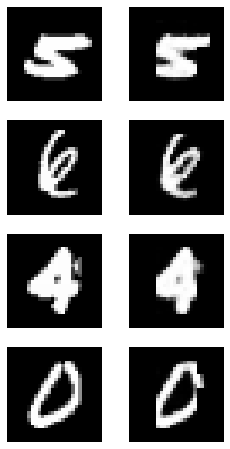

In [28]:
import random
import numpy as np

plt.figure(figsize=(4,8))
for c in range(4):
  plt.subplot(4, 2, c*2+1)
  rand_index = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(4, 2, c*2+2)
  img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
  plt.imshow(img.reshape(28, 28), cmap='gray')
  plt.axis('off')

plt.show()

#model.evaluate(test_X, test_Y)

# 오토인코더 3

1. Relu대신에 Elu 함수 사용

![대체 텍스트](https://kjhov195.github.io/post_img/200107/image10.png)

In [30]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

print(train_X.shape)

#공간정보는 줄어들었고, 의미론적 정보는 늘어났다.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2, 2), activation='elu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2, 2), activation='elu',))

#64*7*7의 1차원 벡터
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation = 'elu'))
model.add(tf.keras.layers.Dense(7*7*64, activation='elu'))#
model.add(tf.keras.layers.Reshape(target_shape=(7,7,64)))
model.add(tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2, 2), padding='same', activation='elu'))
model.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2, 2), padding='same', activation='sigmoid'))


model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

#자기 자신이 입력과 출력으로 되어있음
model.fit(train_X, train_X, epochs=20, batch_size=256)

(60000, 28, 28, 1)
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                200768    
_________________________________________________________________
dense_25 (Dense)             (None, 3136)              203840    
_________________________________________________________________
reshape_5 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None

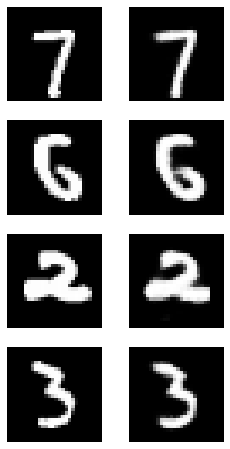

In [33]:
import random
import numpy as np

plt.figure(figsize=(4,8))
for c in range(4):
  plt.subplot(4, 2, c*2+1)
  rand_index = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(4, 2, c*2+2)
  img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
  plt.imshow(img.reshape(28, 28), cmap='gray')
  plt.axis('off')

plt.show()

#model.evaluate(test_X, test_Y)

In [34]:
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(train_X)
print(latent_vector.shape)
print(latent_vector[0])

(60000, 64)
[-1.          1.3417507  11.382336   -1.          4.768135   -0.9999996
  8.322018    7.751847    6.354507   12.038549   -0.99999994 -0.99999994
 31.803802   13.809911   20.814886   17.492311   -0.9999918  27.547056
 -0.9913166  17.147839   15.6108885   3.9884849  18.306057   -0.9999999
 -0.99999994 -1.         14.210168   34.51128    -0.99999994 10.93503
  6.5266523  -1.         -0.9999997  -0.99999994 18.01392    27.305147
 -0.9999998  19.829323    0.78843457 22.12746    34.670113    9.827737
 25.569942   -0.99999666 12.840536   18.911737   19.173615   -0.9999998
 -1.         11.055373   11.924842   19.761667   -0.99999994 34.368824
 -0.99997956 -1.         -0.99999994 -1.          5.5066266  -0.99999994
 -0.99999994  4.830986   -0.99999803 15.667436  ]


# Latent Vector 구하기

In [35]:
#이미 구축한 모델에서 latent_vector들만 추론하는 모델 입력과 출력 레이어를 커스텀하게 설정
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
#하나의 데이터 당 64차원 latent벡터를 얻을 수 있음
latent_vector = latent_vector_model.predict(train_X)
print(latent_vector.shape)
print(latent_vector[0])

(60000, 64)
[-1.          1.3417507  11.382336   -1.          4.768135   -0.9999996
  8.322018    7.751847    6.354507   12.038549   -0.99999994 -0.99999994
 31.803802   13.809911   20.814886   17.492311   -0.9999918  27.547056
 -0.9913166  17.147839   15.6108885   3.9884849  18.306057   -0.9999999
 -0.99999994 -1.         14.210168   34.51128    -0.99999994 10.93503
  6.5266523  -1.         -0.9999997  -0.99999994 18.01392    27.305147
 -0.9999998  19.829323    0.78843457 22.12746    34.670113    9.827737
 25.569942   -0.99999666 12.840536   18.911737   19.173615   -0.9999998
 -1.         11.055373   11.924842   19.761667   -0.99999994 34.368824
 -0.99997956 -1.         -0.99999994 -1.          5.5066266  -0.99999994
 -0.99999994  4.830986   -0.99999803 15.667436  ]


In [36]:
from sklearn.cluster import KMeans
#n_clusters cluster의 개수
#n_init 몇번 iteration을 수행할 것인지?
#random_state 초기화 변수, 최초의 cluster 평균들이 위치되는 인자
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(latent_vector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [37]:
print(kmeans.labels_)
#알고리즘이 찾아낸 평균 점들
print(kmeans.cluster_centers_.shape)
#평균 점들 중 하나 뿌리보기
print(kmeans.cluster_centers_[0])

[0 4 6 ... 0 3 7]
(10, 64)
[-0.9999992  16.511297   14.538929   -0.99999934  4.9661417  -0.9999965
  6.5080986   3.3930027  18.868286   11.507004   -0.9999997  -0.9999982
 18.617134   18.636608   15.078434   20.886955   -0.9999887  25.463821
 -0.9417417  17.467014   14.502799   14.309654   16.830896   -0.9999992
 -0.9999996  -0.99999964 20.506992   29.298698   -0.99999905 16.166708
  5.7047853  -0.99999964 -0.99999815 -0.9999985  15.351427   27.444347
 -0.99999946 20.97923     3.7972605  21.470947   22.016027   16.677639
 20.842812   -0.9999315  13.308309   15.825454   17.011614   -0.9999967
 -0.99999964 11.408974   16.152206   18.85243    -0.9999992  13.362904
 -0.99940234 -0.9999999  -0.9999994  -0.99999917 21.046455   -0.99999946
 -0.9999997   5.2466984  -0.9999892  20.666998  ]


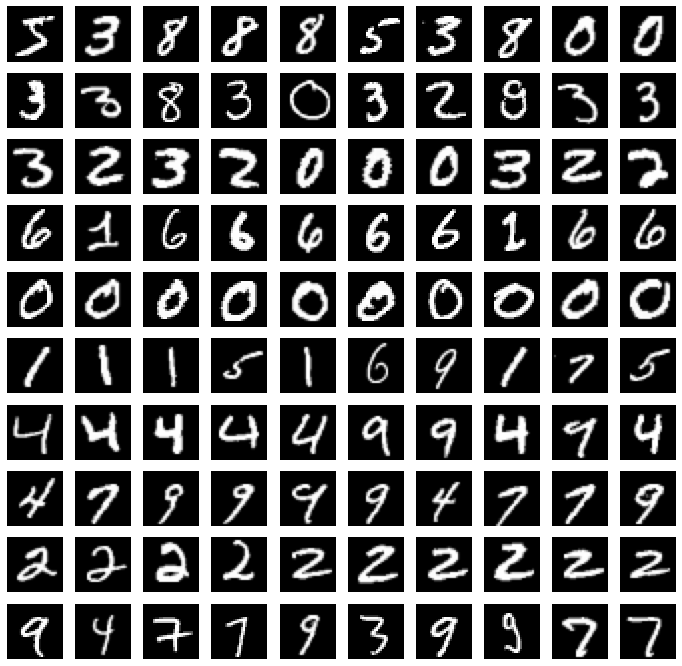

In [41]:
plt.figure(figsize=(12,12))

for i in range(10):
  images = train_X[kmeans.labels_ == i]
  for c  in range(10):
    plt.subplot(10, 10, i*10+c+1)
    plt.imshow(images[c].reshape(28,28), cmap='gray')
    plt.axis('off')

plt.show()

# t-SNE  ------------ p349

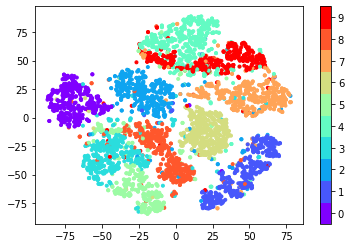

In [44]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

cmap = plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters

cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

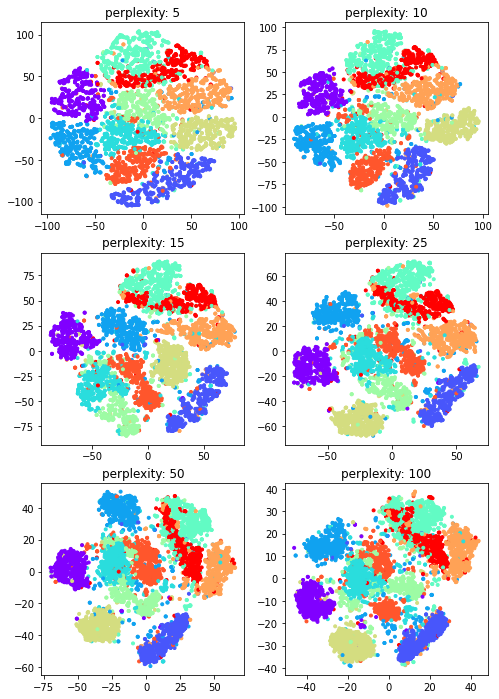

In [47]:
perplexities = [5,10,15,25,50,100]
plt.figure(figsize=(8,12))

for c in range(6):
  tsne = TSNE(n_components=2, learning_rate=100, perplexity=perplexities[c], random_state=0)
  tsne_vector = tsne.fit_transform(latent_vector[:5000])

  plt.subplot(3, 2, c+1)
  plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap='rainbow')
  plt.title('perplexity: {0}'.format(perplexities[c]))

plt.show()

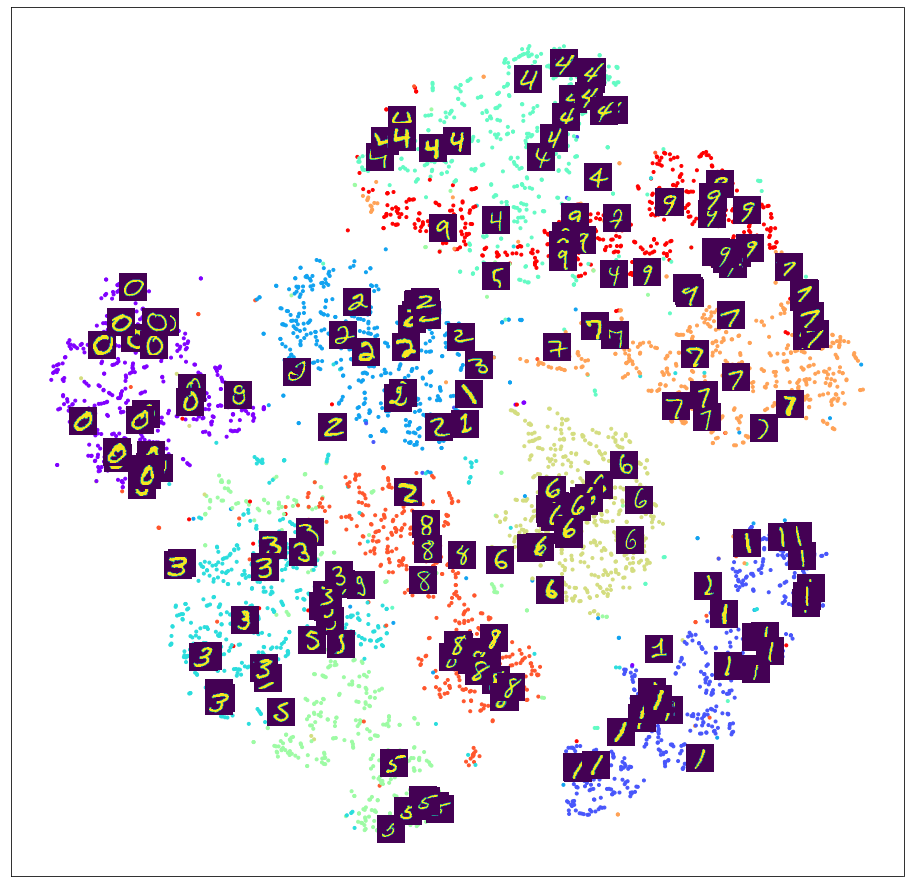

In [54]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

plt.figure(figsize=(16,16))

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

ax = plt.subplot(1, 1, 1)
ax.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap='rainbow')
for i in range(200):
  imagebox = OffsetImage(train_X[i].reshape(28,28))
  ab = AnnotationBbox(imagebox, (tsne_vector[i, 0], tsne_vector[i, 1]), frameon = False, pad=0.0)
  ax.add_artist(ab)

ax.set_xticks([])
ax.set_yticks([])
plt.show()

# 분류문제로 학습 후 Latent Vector 구하여 가시화해보기 -------p163

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()

train_X = train_X/255.0
test_X = test_X/255.0

print(train_Y[0])

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters = 32, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters = 64, padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3),filters=128, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3),filters=256, padding='valid', activation='relu'),
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=512, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=256, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(train_X, train_Y, epochs=20, validation_split=0.25)

11493376/11490434 [==============================] - 0s 0us/step
5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_______________________________________________________

In [4]:
from sklearn.cluster import KMeans
#n_clusters cluster의 개수
#n_init 몇번 iteration을 수행할 것인지?
#random_state 초기화 변수, 최초의 cluster 평균들이 위치되는 인자
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(latent_vector)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

cmap = plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters

cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

NameError: ignored